# House Price Prediction

## Load the Dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv("housing.csv")

In [77]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [79]:
data.dropna(inplace=True) # Remove null values

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Exploration

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [83]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [84]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [85]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
train_data = X_train.join(y_train)

In [87]:
train_data # Training data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3321,-122.83,38.98,17.0,1383.0,347.0,719.0,296.0,1.6164,INLAND,77800.0
11897,-117.37,33.96,33.0,3974.0,548.0,1398.0,528.0,7.2519,INLAND,216600.0
4387,-118.26,34.08,46.0,945.0,250.0,910.0,252.0,3.5039,<1H OCEAN,187500.0
4235,-118.31,34.11,52.0,1875.0,303.0,735.0,293.0,5.8659,<1H OCEAN,433300.0
7066,-118.03,33.94,34.0,1748.0,386.0,917.0,378.0,3.4792,<1H OCEAN,169000.0
...,...,...,...,...,...,...,...,...,...,...
3397,-118.31,34.26,41.0,1297.0,327.0,733.0,315.0,3.0583,<1H OCEAN,160300.0
10913,-117.86,33.73,26.0,1702.0,456.0,2776.0,463.0,2.6385,<1H OCEAN,180200.0
9330,-122.50,37.96,16.0,100.0,20.0,45.0,25.0,6.1359,NEAR BAY,212500.0
718,-122.09,37.68,43.0,1415.0,348.0,569.0,293.0,2.5156,NEAR BAY,190900.0


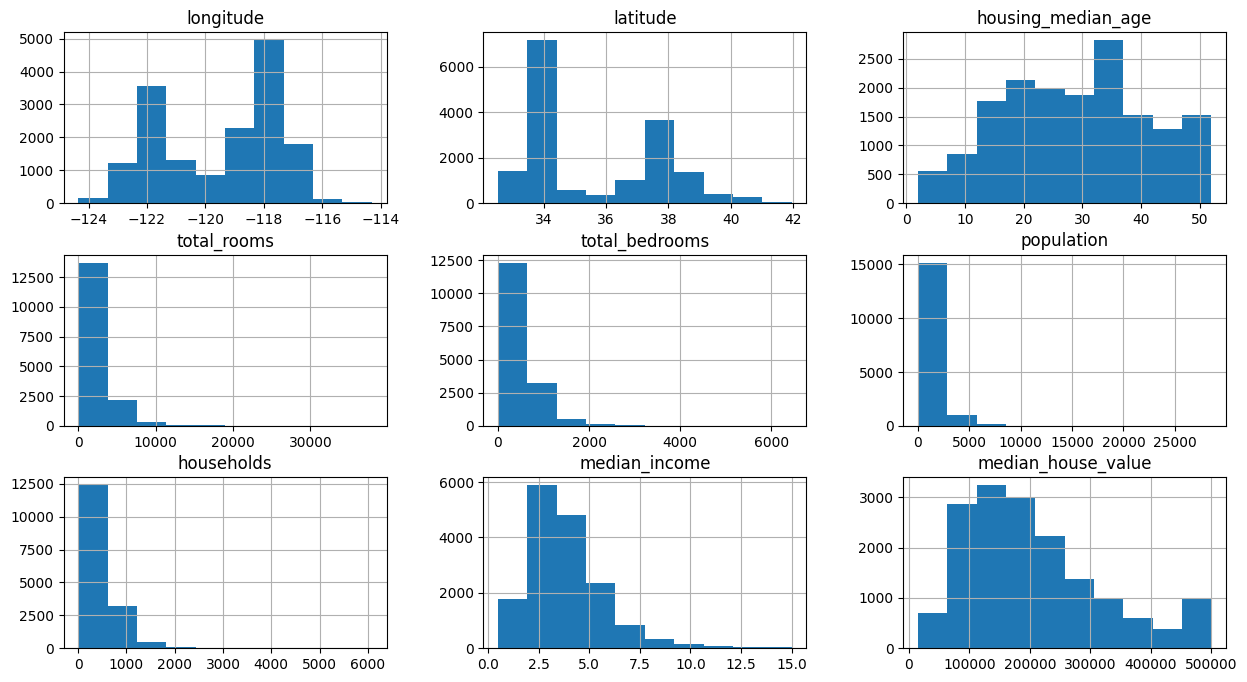

In [88]:
train_data.hist(figsize=(15, 8)); # We notice 4 features look skewed

In [89]:
# Looking for correlation between the data; dropped a troublesome column, temporarily
train_data.drop(["ocean_proximity"], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923925,-0.101858,0.042919,0.065941,0.097536,0.053604,-0.008604,-0.037753
latitude,-0.923925,1.000000,0.005701,-0.034267,-0.063616,-0.107478,-0.069115,-0.087050,-0.152461
housing_median_age,-0.101858,0.005701,1.000000,-0.363094,-0.323589,-0.302189,-0.305649,-0.118785,0.107207
total_rooms,0.042919,-0.034267,-0.363094,1.000000,0.930148,0.866006,0.920625,0.203093,0.135999
total_bedrooms,0.065941,-0.063616,-0.323589,0.930148,1.000000,0.886569,0.981125,-0.003502,0.051650
population,0.097536,-0.107478,-0.302189,0.866006,0.886569,1.000000,0.914216,0.006752,-0.023530
households,0.053604,-0.069115,-0.305649,0.920625,0.981125,0.914216,1.000000,0.017374,0.066610
median_income,-0.008604,-0.087050,-0.118785,0.203093,-0.003502,0.006752,0.017374,1.000000,0.690738
median_house_value,-0.037753,-0.152461,0.107207,0.135999,0.051650,-0.023530,0.066610,0.690738,1.000000


<Axes: >

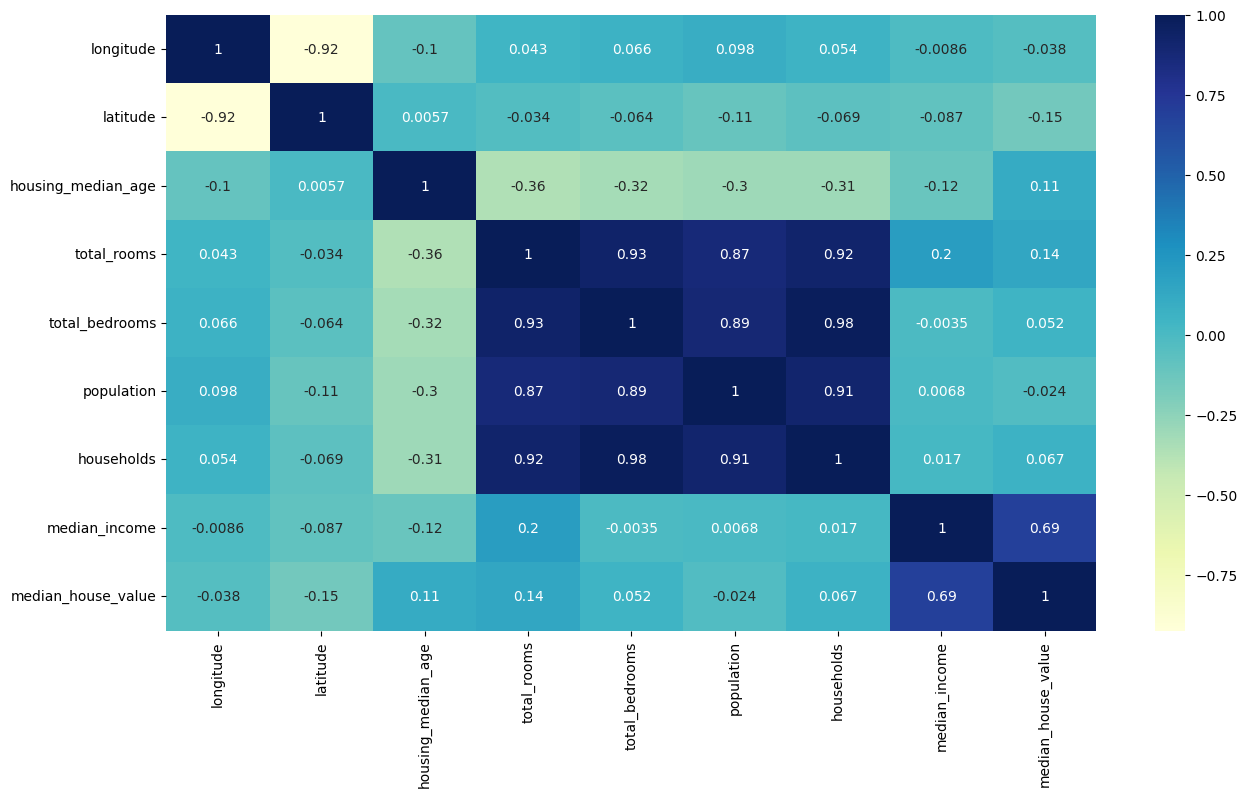

In [90]:
# Same data as before but with color coding
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu")

## Data Preprocessing

In [91]:
# We take the skewed features and find their logarithm
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

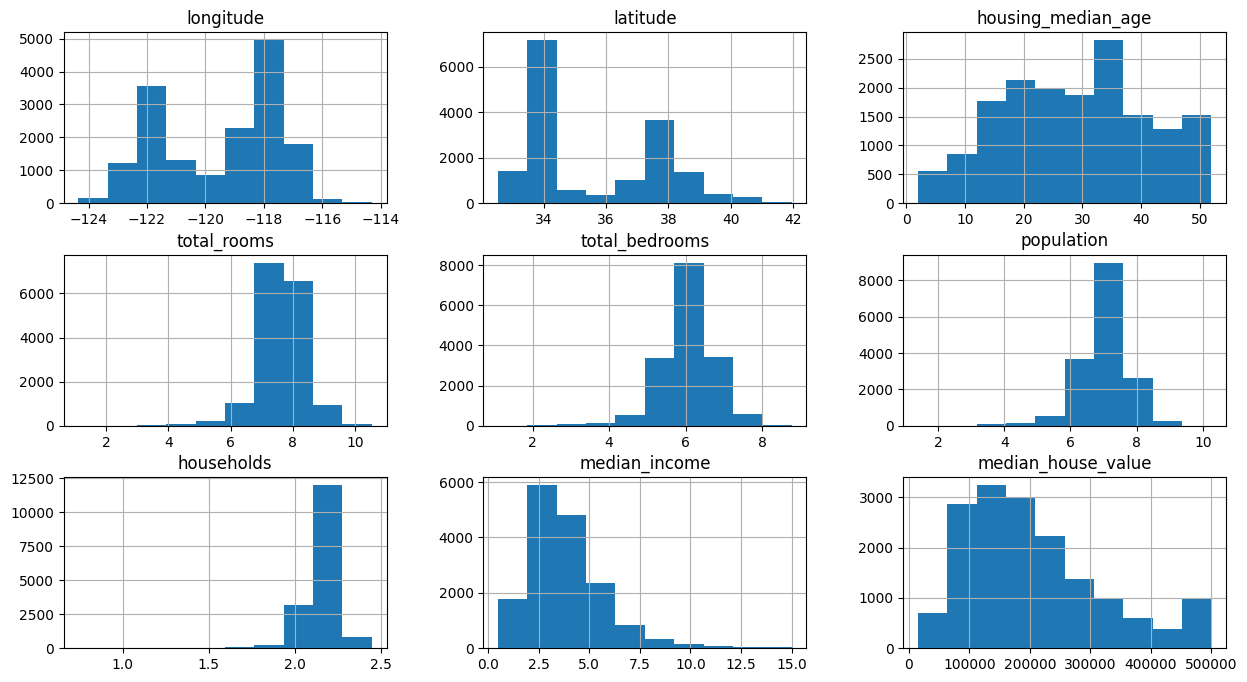

In [92]:
# We notice they now better resemble a Gaussian bell curve
train_data.hist(figsize=(15, 8));

In [93]:
# We now attempt to better represent the ocean_proximity feature
train_data.ocean_proximity.value_counts() # We will turn each value into its own feature

ocean_proximity
<1H OCEAN     7278
INLAND        5191
NEAR OCEAN    2115
NEAR BAY      1758
ISLAND           4
Name: count, dtype: int64

In [94]:
pd.get_dummies(train_data.ocean_proximity) # We have turned each value into its own feature

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3321,False,True,False,False,False
11897,False,True,False,False,False
4387,True,False,False,False,False
4235,True,False,False,False,False
7066,True,False,False,False,False
...,...,...,...,...,...
3397,True,False,False,False,False
10913,True,False,False,False,False
9330,False,False,False,True,False
718,False,False,False,True,False


In [95]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # We append the new features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3321,-122.83,38.98,17.0,7.232733,5.852202,6.579251,2.108118,1.6164,INLAND,77800.0,False,True,False,False,False
11897,-117.37,33.96,33.0,8.287780,6.308098,7.243513,2.228700,7.2519,INLAND,216600.0,False,True,False,False,False
4387,-118.26,34.08,46.0,6.852243,5.525453,6.814543,2.060799,3.5039,<1H OCEAN,187500.0,True,False,False,False,False
4235,-118.31,34.11,52.0,7.536897,5.717028,6.601230,2.144398,5.8659,<1H OCEAN,433300.0,True,False,False,False,False
7066,-118.03,33.94,34.0,7.466799,5.958425,6.822197,2.136153,3.4792,<1H OCEAN,169000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,-118.31,34.26,41.0,7.168580,5.793014,6.598509,2.100295,3.0583,<1H OCEAN,160300.0,True,False,False,False,False
10913,-117.86,33.73,26.0,7.440147,6.124683,7.929126,2.133000,2.6385,<1H OCEAN,180200.0,True,False,False,False,False
9330,-122.50,37.96,16.0,4.615121,3.044522,3.828641,1.725463,6.1359,NEAR BAY,212500.0,False,False,False,True,False
718,-122.09,37.68,43.0,7.255591,5.855072,6.345636,2.110891,2.5156,NEAR BAY,190900.0,False,False,False,True,False


In [96]:
# ocean_proximity is now obsolete
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [97]:
train_data # Verify how the data looks after the modifications

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3321,-122.83,38.98,17.0,7.232733,5.852202,6.579251,2.108118,1.6164,77800.0,False,True,False,False,False
11897,-117.37,33.96,33.0,8.287780,6.308098,7.243513,2.228700,7.2519,216600.0,False,True,False,False,False
4387,-118.26,34.08,46.0,6.852243,5.525453,6.814543,2.060799,3.5039,187500.0,True,False,False,False,False
4235,-118.31,34.11,52.0,7.536897,5.717028,6.601230,2.144398,5.8659,433300.0,True,False,False,False,False
7066,-118.03,33.94,34.0,7.466799,5.958425,6.822197,2.136153,3.4792,169000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,-118.31,34.26,41.0,7.168580,5.793014,6.598509,2.100295,3.0583,160300.0,True,False,False,False,False
10913,-117.86,33.73,26.0,7.440147,6.124683,7.929126,2.133000,2.6385,180200.0,True,False,False,False,False
9330,-122.50,37.96,16.0,4.615121,3.044522,3.828641,1.725463,6.1359,212500.0,False,False,False,True,False
718,-122.09,37.68,43.0,7.255591,5.855072,6.345636,2.110891,2.5156,190900.0,False,False,False,True,False


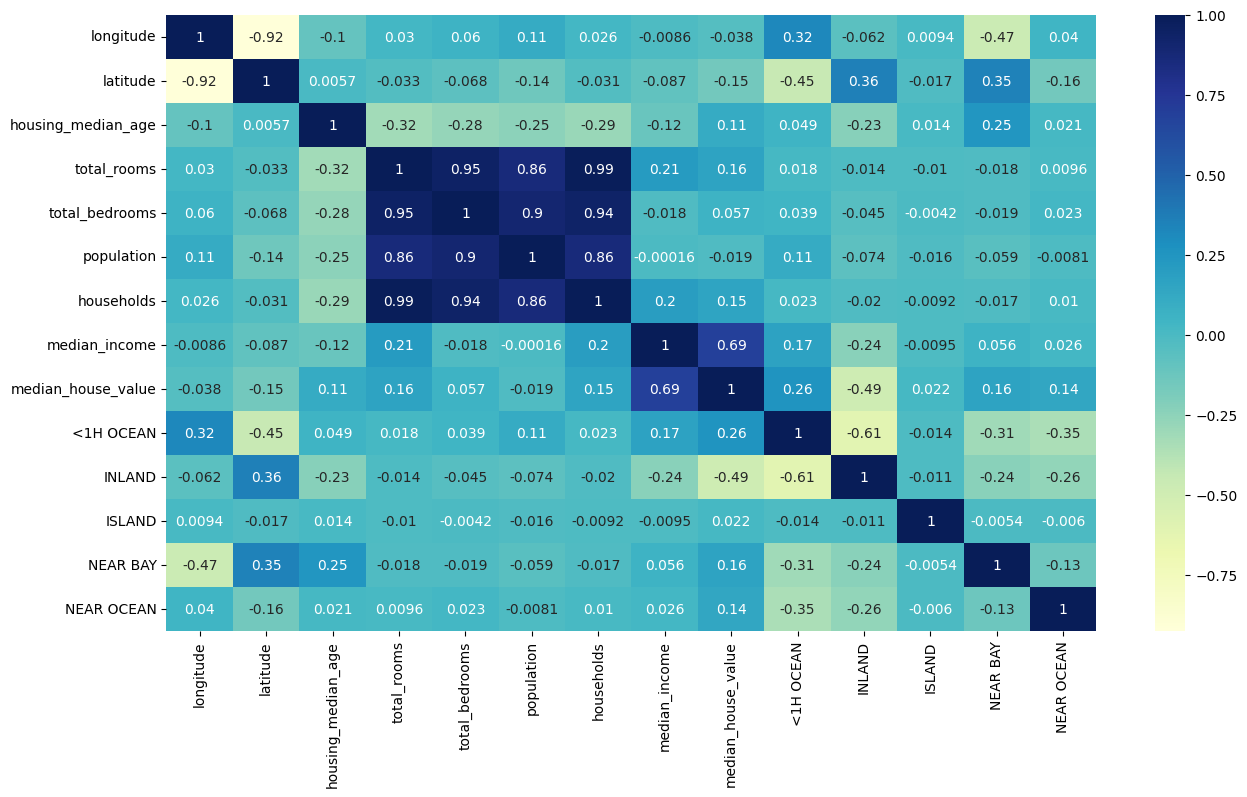

In [98]:
plt.figure(figsize=(15, 8)) # We can better observe the correlation between proximity to water and house price
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

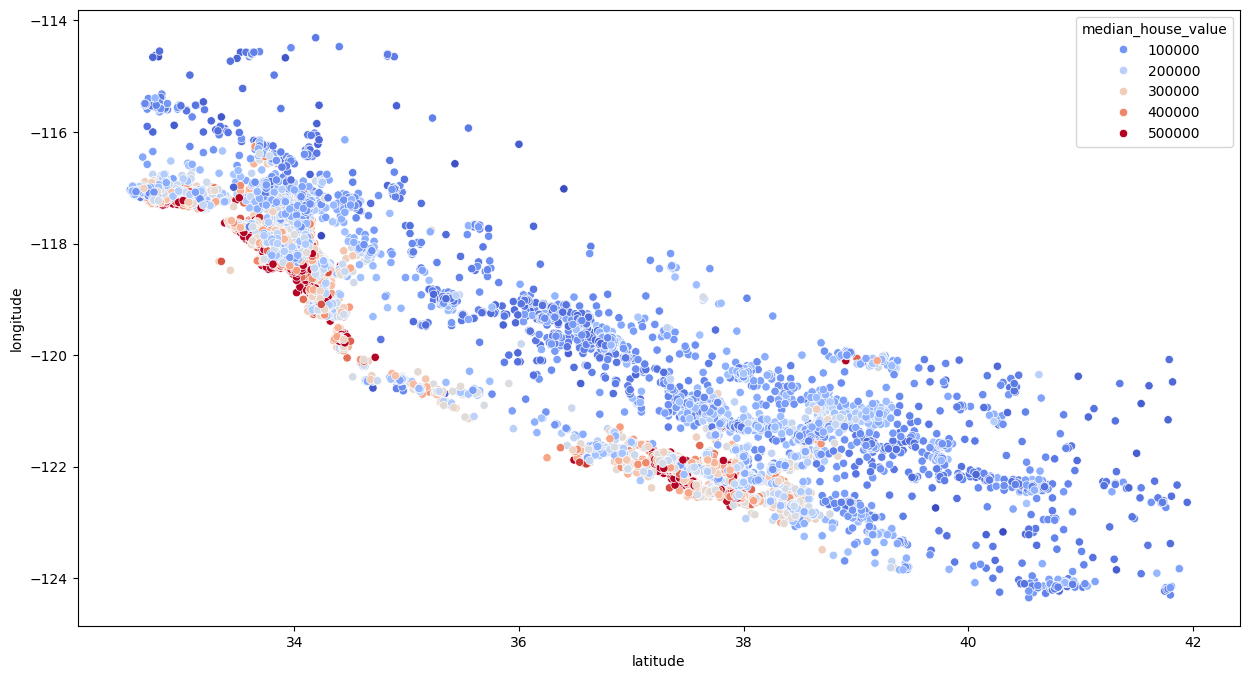

In [99]:
# Interestingly, using a scatterplot allows us to notice where the coast would be situated on the map of California, 
# as the prices increase near the ocean
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

## Feature Engineering

In [100]:
# Possibly insightful features
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

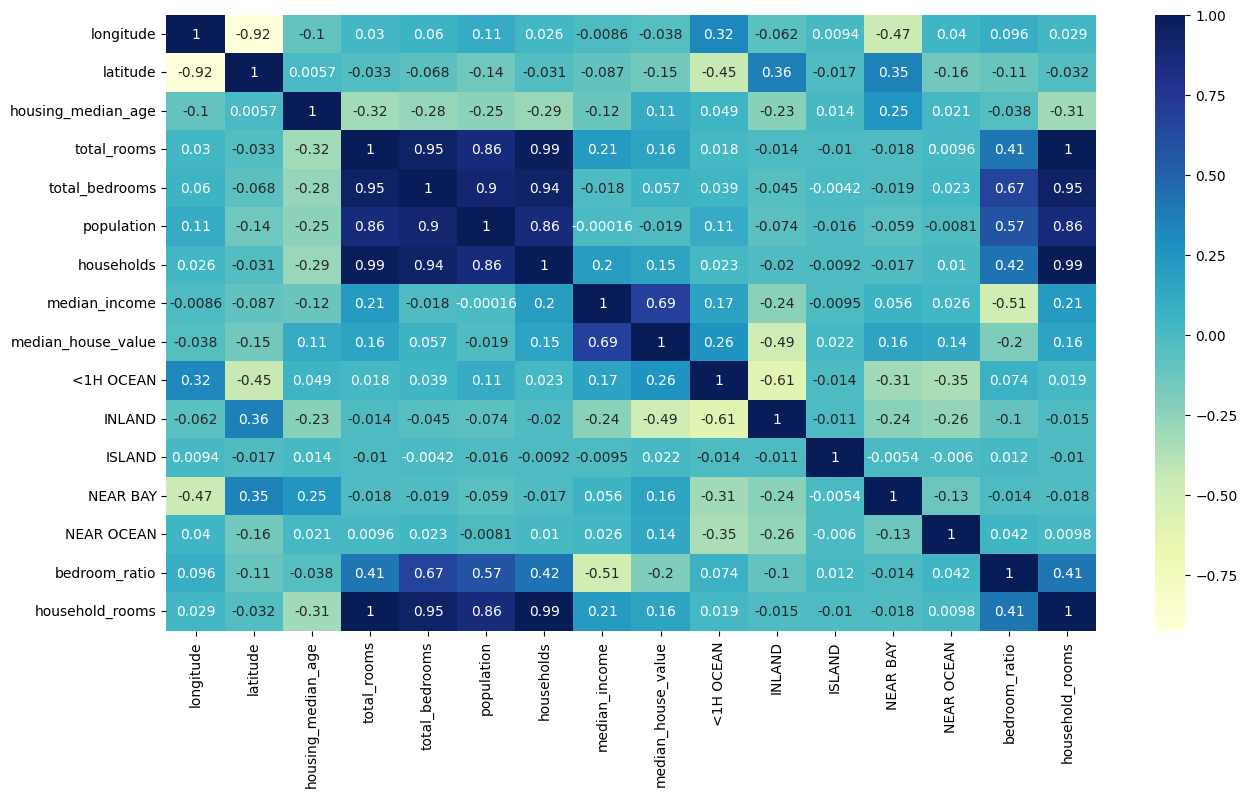

In [101]:
# Look for correlations between our new features and the rest of the data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");
# We notice that one of our new features, "household_rooms", 
# is a bit more relevant than the standalone "households" feature

## Linear Regression Model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

In [104]:
reg = LinearRegression()

In [105]:
reg.fit(X_train, y_train);

In [106]:
# Repeat the feature engineering steps for the test data
test_data = X_test.join(y_test)

# We take the skewed features and find their logarithm
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["total_rooms"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [107]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [108]:
reg.score(X_test, y_test) # Score with unscaled data

0.6574634455005277

## Random Forest Model

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
forest = RandomForestRegressor()

In [113]:
forest.fit(X_train, y_train);

In [114]:
# In this case, we can observe a better score with this model
forest.score(X_test, y_test)

0.8101514634033969

### Grid Search Cross Validation

In [115]:
from sklearn.model_selection import GridSearchCV

In [119]:
# The cross validation will be performed with all possible combinations from param_grid
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

In [120]:
grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring="neg_mean_squared_error",
                            return_train_score=True)

In [121]:
grid_search.fit(X_train, y_train)

In [122]:
best_forest = grid_search.best_estimator_

In [124]:
# The GSCV did not improve our result which is rare but can happen
best_forest.score(X_test, y_test)

0.8080208786067078

#### Grid Search Cross Validation with improvements to param_grid

In [125]:
forest = RandomForestRegressor()

param_grid = { # Modified
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring="neg_mean_squared_error",
                            return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
best_forest = grid_search.best_estimator_

# We got to see small improvements after fine tuning the parameters
best_forest.score(X_test, y_test)

0.812548571530771